## Satellite Image Classification using Neural Networks: Part2-Model Building

### Importing libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler 
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from time import time
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


In [2]:
def trian_data_read(data_path):
    df=pd.read_csv(data_path, index_col=[0])
    return df

def test_data_read(data_path):
    df=pd.read_csv(data_path, header=None)
    return df

       

### Reading train data

In [4]:
train_data=trian_data_read(data_path="train_feature_deepstat_6.csv")
train_label=test_data_read(data_path="deepsat-sat6/y_train_sat6.csv")
print("Training data shape: ",train_data.shape)
print("Training label shape: ",train_label.shape)

Training data shape:  (324000, 18)
Training label shape:  (324000, 6)


In [5]:
train_data.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17
0,0.000510,617.467448,0.744604,1208.225664,0.075734,165.287322,4215.435207,7.637573,11.158415,0.000144,5.546250,-0.356272,0.995773,0.365449,0.207631,4.211562e-08,0.130287,0.082918
1,0.001207,417.651225,0.397474,373.466474,0.082166,321.815240,1076.214670,6.722432,10.047084,0.000350,4.048463,-0.345718,0.991588,0.090416,0.258090,8.581116e-08,0.136626,0.142940
2,0.000398,1943.661871,0.403912,1619.892120,0.041302,156.599515,4535.906611,7.854340,11.419267,0.000051,6.343184,-0.394795,0.998089,0.599307,0.510874,5.071253e-08,-0.762366,-0.488413
3,0.000410,1016.512108,0.571321,1181.209671,0.048341,160.536238,3708.326575,7.776289,11.377842,0.000085,5.898673,-0.375375,0.997312,0.579702,0.435979,4.884989e-08,-0.779538,-0.482682
4,0.000647,487.816884,0.296176,345.964345,0.067422,288.690819,896.040495,6.823493,10.881089,0.000118,5.422547,-0.235495,0.972060,0.516917,0.193726,7.365289e-08,-0.659481,-0.320696


In [6]:
train_label.head()

,0,1,2,3,4,5
0,0,0,1,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,0,0,1


### Reading test data

In [7]:
test_data=trian_data_read(data_path="test_feature_deepsat_6.csv")
test_label=test_data_read(data_path="deepsat-sat6/y_test_sat6.csv")
print("Test data shape: ",test_data.shape)
print("Test label shape: ",test_label.shape)

Test data shape:  (81000, 18)
Test label shape:  (81000, 6)


In [8]:
test_data.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17
0,0.000472,825.146019,0.483915,799.436334,0.054771,163.380355,2372.599315,7.433824,11.232332,0.000107,5.772372,-0.321464,0.992508,0.342550,0.203484,4.158225e-08,0.300045,0.188149
1,0.000747,450.118996,0.520765,468.906282,0.082015,203.764809,1425.506132,7.055624,10.791574,0.000153,5.301941,-0.278724,0.983755,0.203896,0.131008,5.035616e-08,0.235854,0.156365
2,0.000375,1244.129580,0.599170,1543.860577,0.041937,224.183576,4931.312727,7.980644,11.476607,0.000063,6.082126,-0.409750,0.998548,0.565407,0.333206,6.285180e-08,-0.672770,-0.387071
3,0.001382,388.768318,0.387355,330.283150,0.064144,272.052422,932.364281,6.665846,9.931245,0.000168,4.945995,-0.221024,0.951162,0.068662,0.239222,7.308982e-08,0.243074,0.193786
4,0.000713,435.000939,0.467699,418.204251,0.071743,111.584020,1237.816065,6.963757,10.728918,0.000235,5.109433,-0.268148,0.980983,0.599072,0.514390,3.666192e-08,-0.841739,-0.561151


In [9]:
test_label.head()

,0,1,2,3,4,5
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,0,0,0,0,1
3,0,1,0,0,0,0
4,0,0,0,0,0,1


### Data standardization

In [10]:
sc=StandardScaler()
#fit the training data
fit=sc.fit(train_data)

In [11]:
##transform the train and test data
train_data_stn=fit.transform(train_data)
test_data_stn=fit.transform(test_data)

### Model Building

In [14]:
model=Sequential()

#layer1
model.add(Dense(units=50,input_shape=(train_data_stn.shape[1],),use_bias=True))
#model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.2))

#layer2
model.add(Dense(units=50, use_bias=True))
#model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.2))

#layer3
model.add(Dense(units=6, activation="softmax"))


##ADD early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
tensorboard = TensorBoard(log_dir='logs/{}'.format(time()))
#tensorboard=TensorBoard(log_dir='logs/{}'.format(time()))

#compile the model
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])



### Model Training

In [15]:
model.fit(train_data_stn, train_label.values, validation_split=0.2, batch_size=128, epochs=500,callbacks=[es, mc,tensorboard]) 


Train on 259200 samples, validate on 64800 samples


Epoch 1/500
259200/259200 [==============================] - 3s 12us/step - loss: 0.1435 - accuracy: 0.9535 - val_loss: 0.0647 - val_accuracy: 0.9773

Epoch 00001: val_accuracy improved from -inf to 0.97731, saving model to best_model.h5

Epoch 2/500
259200/259200 [==============================] - 3s 10us/step - loss: 0.0720 - accuracy: 0.9753 - val_loss: 0.0528 - val_accuracy: 0.9816

Epoch 00002: val_accuracy improved from 0.97731 to 0.98162, saving model to best_model.h5
Epoch 3/500
259200/259200 [==============================] - 3s 10us/step - loss: 0.0614 - accuracy: 0.9791 - val_loss: 0.0482 - val_accuracy: 0.9827

Epoch 00003: val_accuracy improved from 0.98162 to 0.98270, saving model to best_model.h5
Epoch 4/500
259200/259200 [==============================] - 3s 10us/step - loss: 0.0555 - accuracy: 0.9813 - val_loss: 0.0444 - val_accuracy: 0.9841

Epoch 00004: val_accuracy improved from 0.98270 to 0.98410, saving model t


Epoch 00033: val_accuracy improved from 0.99216 to 0.99219, saving model to best_model.h5
Epoch 34/500
259200/259200 [==============================] - 3s 10us/step - loss: 0.0313 - accuracy: 0.9896 - val_loss: 0.0220 - val_accuracy: 0.9923

Epoch 00034: val_accuracy improved from 0.99219 to 0.99231, saving model to best_model.h5
Epoch 35/500
259200/259200 [==============================] - 3s 10us/step - loss: 0.0312 - accuracy: 0.9896 - val_loss: 0.0223 - val_accuracy: 0.9921

Epoch 00035: val_accuracy did not improve from 0.99231
Epoch 36/500
259200/259200 [==============================] - 3s 10us/step - loss: 0.0307 - accuracy: 0.9900 - val_loss: 0.0224 - val_accuracy: 0.9923

Epoch 00036: val_accuracy did not improve from 0.99231
Epoch 37/500
259200/259200 [==============================] - 3s 10us/step - loss: 0.0311 - accuracy: 0.9897 - val_loss: 0.0235 - val_accuracy: 0.9914

Epoch 00037: val_accuracy did not improve from 0.99231
Epoch 38/500
259200/259200 [==================

### Load Trained Model

In [17]:
best_train_model=keras.models.load_model('best_model.h5')


### Model Evaluation

In [20]:
Accuracy_on_test_data=best_train_model.evaluate(test_data_stn, test_label.values)
Accuracy_on_test_data

81000/81000 [==============================] - 1s 13us/step


[0.019232429005773318, 0.9942222237586975]

### Confusion Matrix Creation

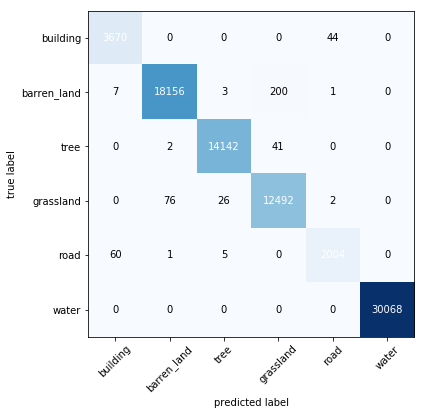

In [21]:
#label converter
# [1,0,0,0,0,0]=building
# [0,1,0,0,0]=barren_land
# [0,0,1,0,0,0]=tree
# [0,0,0,1,0,0]=grassland
# [0,0,0,0,1,0]=road
# [0,0,0,0,0,1]=water


##Building confusion matrix

y_pred=best_train_model.predict_classes(test_data_stn)
y_true=np.argmax(test_label.values, axis=1)
cm=confusion_matrix(y_target=y_true, y_predicted=y_pred)

plot_confusion_matrix(cm,class_names=["building","barren_land","tree","grassland","road","water"],figsize=(6,6) )
plt.show()

### Precision and Recall calculation

In [22]:
def precision(label, confusion_matrix):
    col = confusion_matrix[:, label]
    return confusion_matrix[label, label] / col.sum()
    
def recall(label, confusion_matrix):
    row = confusion_matrix[label, :]
    return confusion_matrix[label, label] / row.sum()

def precision_macro_average(confusion_matrix):
    rows, columns = confusion_matrix.shape
    sum_of_precisions = 0
    for label in range(rows):
        sum_of_precisions += precision(label, confusion_matrix)
    return sum_of_precisions / rows

def recall_macro_average(confusion_matrix):
    rows, columns = confusion_matrix.shape
    sum_of_recalls = 0
    for label in range(columns):
        sum_of_recalls += recall(label, confusion_matrix)


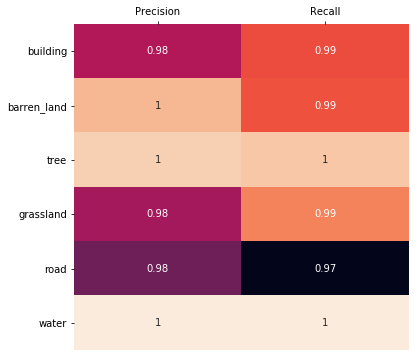

In [23]:

dic={}
precision_=[]
recall_=[]
precision_macro_average_=[]
for label in range(6):
    precision_.append(precision(label, cm))
    recall_.append(recall(label, cm))
    
dic["Precision"]= precision_
dic["Recall"]= recall_

plt.figure(figsize=(6,6))
ax=sns.heatmap(pd.DataFrame(dic, index=["building","barren_land","tree","grassland","road","water"]),annot=True,cbar=False)
plt.yticks(rotation=0)
ax.xaxis.tick_top() # x axis on top

plt.show()